# DATA VISUALIZATION: ART INSTITUTE OF CHICAGO

In [65]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import plotly.express as px
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import networkx as nx

In [66]:
# After scraping from the internet, we obtained this dataset.
df = pd.read_csv('project_dataset.csv')

In [67]:
# We check for missing values.
null_counts = df.isna().sum()
if null_counts.sum() == 0:
    print('There are no null values')
else:
    print(null_counts)

id                             0
title                          0
has_not_been_viewed_much       0
date_start                    22
date_end                      22
medium_display                49
is_public_domain               0
has_multimedia_resources       0
has_educational_resources      0
has_advanced_imaging           0
colorfulness                 115
is_on_view                     0
artwork_type_title             2
department_title               2
artist_title                 271
dtype: int64


In [68]:
# We drop null values for the variables date_start, date_end, medium_display, artwork_type_title, department_title
# and artist_title.
df.dropna(subset=['date_start', 'date_end', 'medium_display', 'artwork_type_title', 'department_title', 'artist_title'],
          inplace=True)


In [69]:
# For the variable colorfulness, we can fill the null values with the median.
df['colorfulness'].fillna(df['colorfulness'].median(), inplace=True)

In [70]:
# This is how the dataset looks like.
df.head()

,id,title,has_not_been_viewed_much,date_start,date_end,medium_display,is_public_domain,has_multimedia_resources,has_educational_resources,has_advanced_imaging,colorfulness,is_on_view,artwork_type_title,department_title,artist_title
0,11434,Salome with the Head of Saint John the Baptist,False,1635.0,1645.0,Oil on canvas,True,True,False,False,25.7281,False,Painting,Painting and Sculpture of Europe,Guido Reni
1,14572,The Millinery Shop,False,1874.0,1886.0,Oil on canvas,True,True,False,False,38.9301,False,Painting,Painting and Sculpture of Europe,Hilaire Germain Edgar Degas
2,11723,Woman at Her Toilette,False,1870.0,1880.0,Oil on canvas,True,True,False,False,16.6011,False,Painting,Painting and Sculpture of Europe,Berthe Morisot
3,16554,The Artist's House at Argenteuil,False,1873.0,1873.0,Oil on canvas,True,True,False,False,25.0588,False,Painting,Painting and Sculpture of Europe,Claude Monet
4,21934,Kitchen Scene,False,1618.0,1622.0,Oil on canvas,True,True,False,False,13.2756,False,Painting,Painting and Sculpture of Europe,Diego Velázquez


# First Task:
# Understand the structure of the museum by analyzing the different curational departments.

### 1.a.
For this analysis, we first want to focus on the curatorial departments inside the Museum, in order to find any patterns or insights that might be useful to better comprehend how the various artworks are distributed.

In [71]:
# We set the font properties, so that all the graphs have the same ones.
font_t = {'family': 'Andale Mono', 'size': 20, 'weight': 'bold'}
font_lab = {'family': 'Andale Mono', 'size': 16}


The baseline plot is a bar chart, where we plot the departments based on the number of artworks that belong to them.

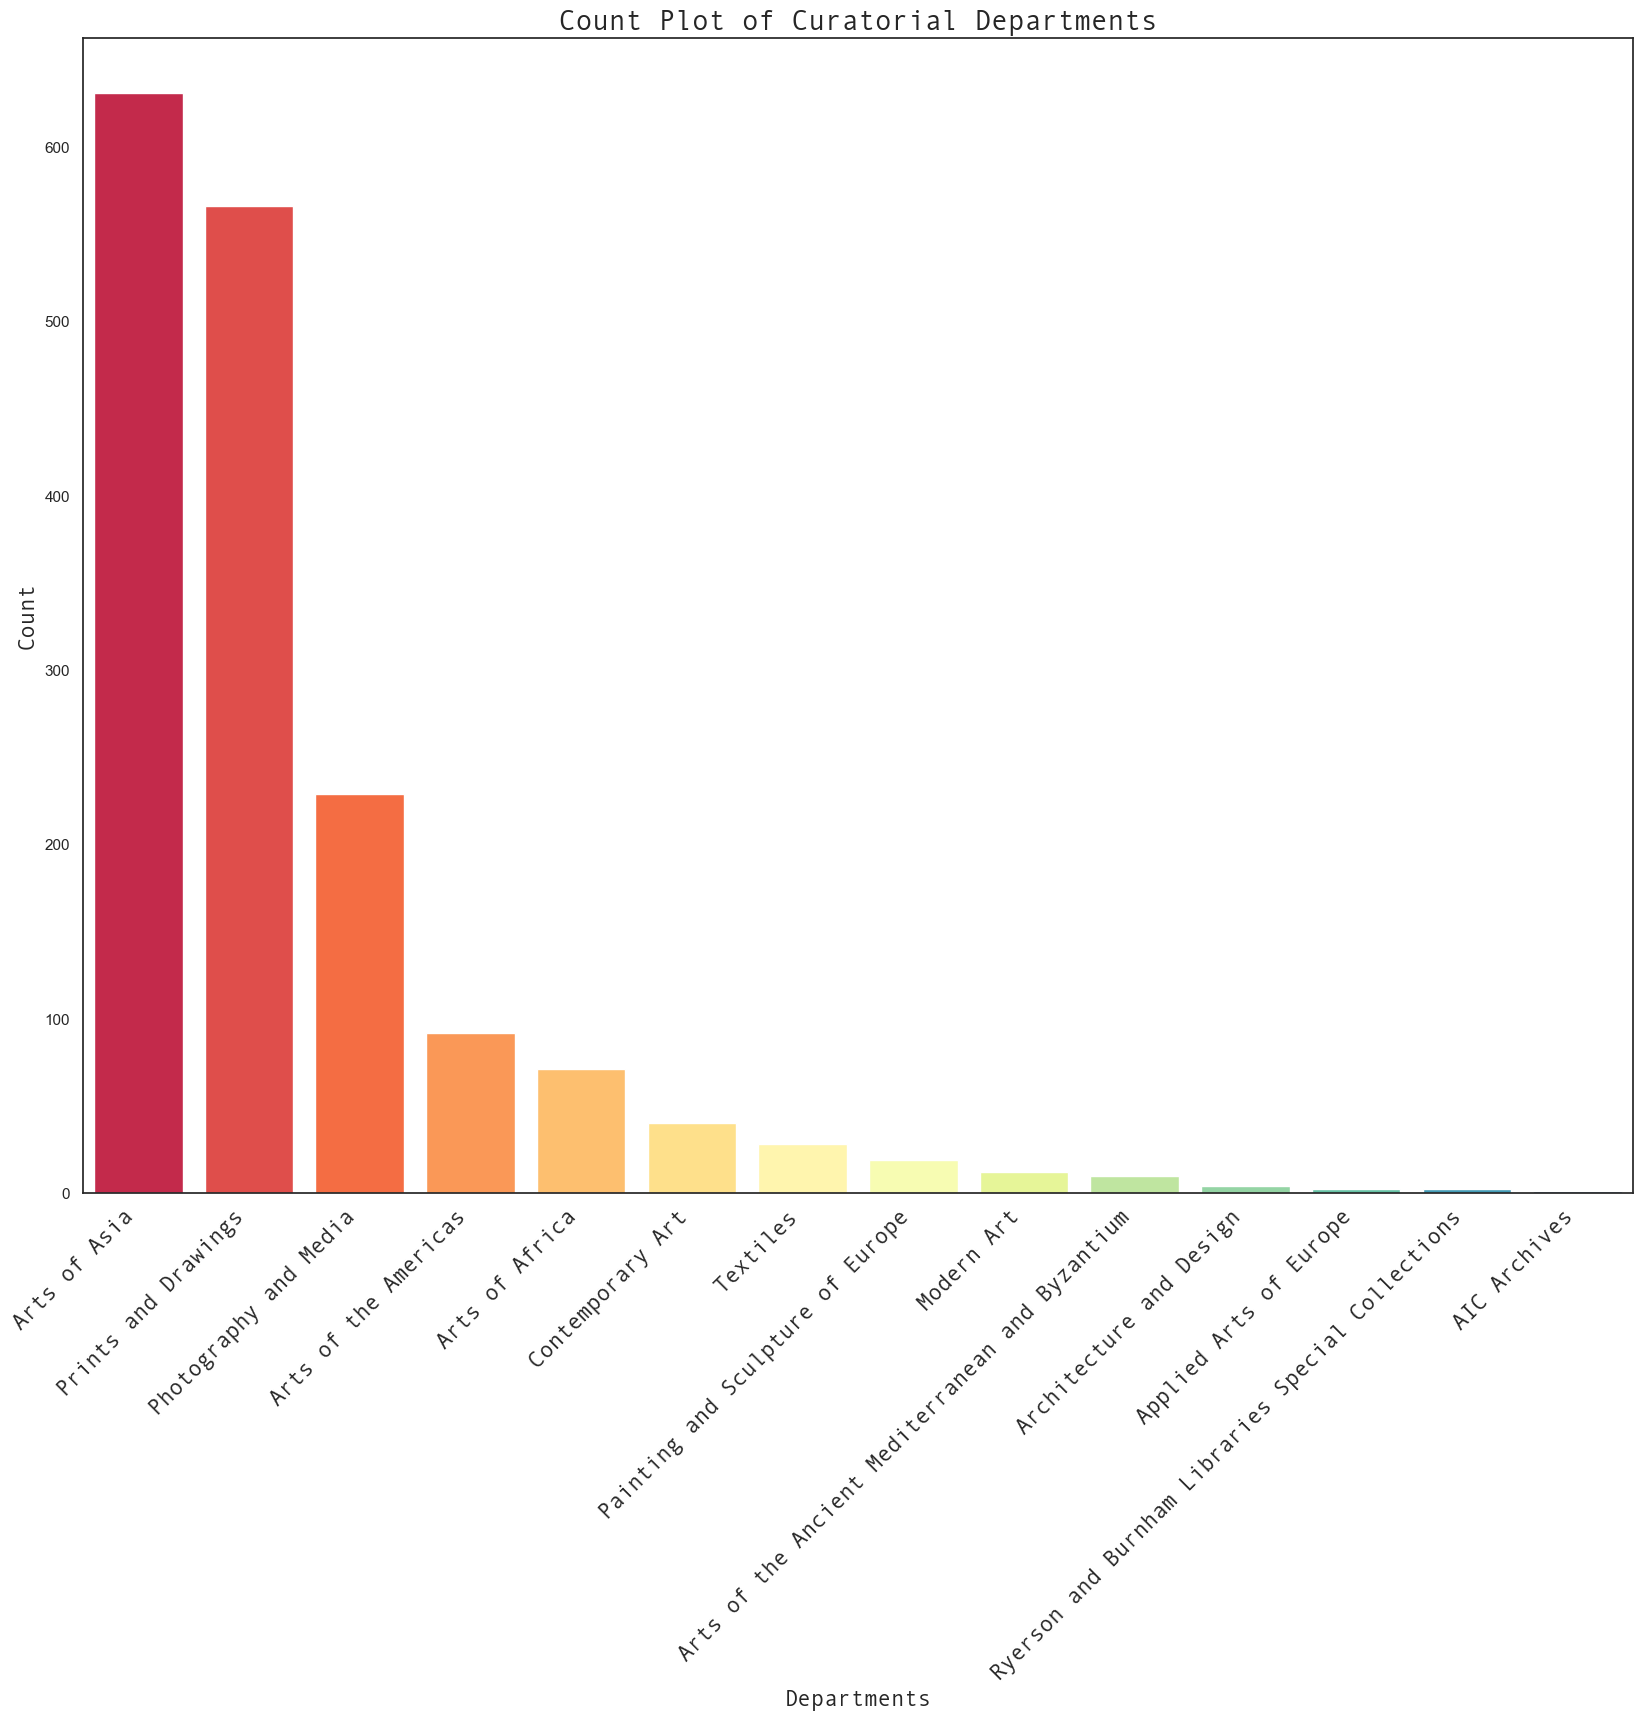

In [72]:
plt.figure(figsize=(20, 15))

# We set the theme
sns.set_theme(style="white")

# Create the countplot
counts = df['department_title'].value_counts().sort_values(ascending=False)
dep = sns.countplot(x='department_title', data=df, palette='Spectral', saturation=10, order=counts.index)

# Set the x-axis label
dep.set_xlabel('Departments', fontdict=font_lab)

# Set the y-axis label
dep.set_ylabel('Count', fontdict=font_lab)

# Set the title
dep.set_title('Count Plot of Curatorial Departments', fontdict=font_t)

# Rotate the x-axis labels
dep.set_xticklabels(dep.get_xticklabels(), rotation=45, horizontalalignment='right', fontdict=font_lab)

plt.show()

The distribution of artworks among the various departments indicates that the Art Institute of Chicago has a diverse collection that covers a range of cultures and time periods, with a particular emphasis on Asian art and works on paper.

Additionally, the relatively small number of artworks in some departments, such as Contemporary Art, Textiles, and Modern Art, may suggest that the Art Institute of Chicago prioritizes collecting and displaying historical art over more recent works. This is also confirmed by the presence of departments such as Arts of the Ancient Mediterranean and Byzantium and Applied Arts of Europe, which highlights the Art Institute of Chicago's commitment to preserving and showcasing art from a variety of cultures and historical periods.

It is also interesting to note that the Arts of the Americas and Arts of Africa departments have fewer artworks than some of the other departments. This may reflect a historical bias towards Western art in museums and collections, but it is positive that the Art Institute of Chicago has dedicated departments for these regions and probably in the future will to expand their collections.

Overall, the distribution of artworks among the various departments provides insight into the Art Institute of Chicago's collection and curatorial priorities, which include diversity and inclusivity in terms of cultures and historical periods represented.

### 1.b.
Secondly, we analyse whether an artwork is still in exposition and whether it is in public or private domain. The aim of this analysis is to identify which departments have a greater percentage of artworks currently on display, as well as those that have a higher proportion of artworks in public or private domain. It would also allow us to compare these proportions between different departments and identify any patterns or trends that may be of interest.

For this purpose, we plot an interactive stacked bar chart: the first one shows the percentages of artworks that are/are not on view in each department; the other one shows different percentages according to the artworks’ domain (either public or private).

In [73]:
# We calculate the unique values in the 'department_title' column of the dataset, setting them in descending order.
dep_counts = df['department_title'].value_counts().sort_values(ascending=False)

# We group the original dataset by the department_title column.
dep_grouped = df.groupby('department_title')

# We calculate how many artworks are (are not) on view and are in public or private domain for each department.
is_on_view_count = dep_grouped['is_on_view'].sum()[dep_counts.index]
is_not_on_view_count = (dep_counts - is_on_view_count)[dep_counts.index]
public_count = dep_grouped['is_public_domain'].sum()[dep_counts.index]
private_count = (dep_counts - public_count)[dep_counts.index]

# We create the first figure.
fig1 = go.Figure()

# We add traces for the first stacked bar chart.
fig1.add_trace(go.Bar(x=dep_counts.index, y=is_not_on_view_count, name='Is Not On View', marker_color='darkgreen'))
fig1.add_trace(go.Bar(x=dep_counts.index, y=is_on_view_count, name='Is On View', marker_color='lime'))

# We customize the layout of the first chart and add interactivity.
fig1.update_layout(
    template='simple_white',
    title={
        'text': 'Artworks on View by Department',
        'font': {'size': 20, 'family': 'Andale Mono'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=1200,
    # width = 800 for the website graphs
    height=800,
    xaxis_tickangle=-45,
    yaxis_title='Count',
    hovermode='closest',
    barmode='stack',
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Zoom',
            method='relayout',
            args=[{'xaxis.range': [0, 2]}]
        ), dict(
            label='Reset',
            method='relayout',
            args=[{'xaxis.range': [None, None]}]
        )]
    )],
    legend=dict(
        font=dict(size=16, family='Andale Mono'),
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    ),
    xaxis=dict(
        title=dict(text='Department', font=dict(size=18, family='Andale Mono')),
        tickfont=dict(size=14, family='Andale Mono')
    ),
    yaxis=dict(
        title=dict(text='Count', font=dict(size=18, family='Andale Mono')),
        tickfont=dict(size=14, family='Andale Mono')
    )
)

# We create the second figure.
fig2 = go.Figure()

# We add traces for the second stacked bar chart.
fig2.add_trace(go.Bar(x=dep_counts.index, y=private_count, name='Private Domain', marker_color='darkred'))
fig2.add_trace(go.Bar(x=dep_counts.index, y=public_count, name='Public Domain', marker_color='red'))

# We customize the layout of the second chart and add interactivity.
fig2.update_layout(
    template='simple_white',
    title={
        'text': 'Artworks in Public/Private Domain by Department',
        'font': {'size': 20, 'family': 'Andale Mono'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=1200,
    # width = 800 for the website graphs
    height=800,
    xaxis_tickangle=-45,
    yaxis_title='Count',
    hovermode='closest',
    barmode='stack',
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Zoom',
            method='relayout',
            args=[{'xaxis.range': [0, 2]}]
        ), dict(
            label='Reset',
            method='relayout',
            args=[{'xaxis.range': [None, None]}]
        )]
    )],
    legend=dict(
        font=dict(size=16, family='Andale Mono'),
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    ),
    xaxis=dict(
        title=dict(text='Department', font=dict(size=18, family='Andale Mono')),
        tickfont=dict(size=14, family='Andale Mono')
    ),
    yaxis=dict(
        title=dict(text='Count', font=dict(size=18, family='Andale Mono')),
        tickfont=dict(size=14, family='Andale Mono')
    )
)

# Show the charts
fig1.show()
fig2.show()

# We save them in html
#fig1.write_html('is-view.html')
#fig2.write_html('pub-priv.html')

As for the exposition, we can see that the majority of artworks in the dataset are no longer on display, with a few exceptions for some departments. This is likely due to the fact that the scraping was done on an archive of works in the museum. It is not surprising that the department with the highest number of artworks on display is Arts of the Americas, probably because the Institute is in America. What is surprising, however, is the presence of European and Ancient Mediterranean and Byzantine artworks, which confirms the museum's commitment to inclusivity and diversity in terms of cultures and historical periods.

As for the domain, we can notice that the majority of artworks are in the private domain, especially in those departments concerning recent works such as prints or photography, or relatively new art forms that have only recently received attention, such as African art. The only exceptions are Asian, European, and Ancient Mediterranean and Byzantinium art, but it is not surprising since these are very ancient arts, and it is quite obvious that the authors are passed away and the works have become public domain.

We made this comparison to see if there could be a relationship between the two variables, and in fact, we can see that most of the ancient and therefore public domain works, such as Asian or European, are no longer on display, while works of more recent and therefore private art, such as American art, are more prominently displayed.

### 1.c.
Lastly, we want to study the trend of artworks creation over time.

For this aim, we use an interactive line chart that shows the number of artworks created over the years, giving the possibility to hover data to show details. It is worth mentioning that the years are categorized by intervals of x years. 

In [74]:
# We calculate the unique values in the 'department_title' column of the dataset.
dep_counts = df['department_title'].value_counts()
print(dep_counts)

Arts of Asia                                         631
Prints and Drawings                                  566
Photography and Media                                229
Arts of the Americas                                  92
Arts of Africa                                        71
Contemporary Art                                      40
Textiles                                              28
Painting and Sculpture of Europe                      19
Modern Art                                            12
Arts of the Ancient Mediterranean and Byzantium       10
Architecture and Design                                4
Applied Arts of Europe                                 2
Ryerson and Burnham Libraries Special Collections      2
AIC Archives                                           1
Name: department_title, dtype: int64


In [75]:
# We create a new df, including only the top three departments which are the ones with most artworks.
top_three_df = df[df['department_title'].isin(['Arts of Asia', 'Prints and Drawings', 'Photography and Media'])]
top_three_df.head()

,id,title,has_not_been_viewed_much,date_start,date_end,medium_display,is_public_domain,has_multimedia_resources,has_educational_resources,has_advanced_imaging,colorfulness,is_on_view,artwork_type_title,department_title,artist_title
6,22749,Ghana,True,1960.0,1960.0,Gelatin silver print,False,False,False,False,5.1209,False,Photograph,Photography and Media,Marc Riboud
7,22736,Ghana,True,1960.0,1960.0,Gelatin silver print,False,False,False,False,5.0376,False,Photograph,Photography and Media,Marc Riboud
9,26715,Seated Nude,False,1858.0,1860.0,Red chalk on buff laid paper,True,False,False,False,48.4188,False,Drawing and Watercolor,Prints and Drawings,Édouard Manet
14,62337,"Francis Bacon Walking on Primrose Hill, London",False,1963.0,1963.0,Gelatin silver print,False,False,False,False,5.5778,False,Photograph,Photography and Media,Bill Brandt
23,90859,Pole Vault (Pryzhok s shestom),False,1936.0,1936.0,Gelatin silver print,False,False,False,False,14.6352,False,Photograph,Photography and Media,Aleksandr Mikhailovich Rodchenko


In [76]:
# We create a new column representing each time period. Each class is of 100 years.
top_three_df['time_period'] = pd.cut(top_three_df['date_start'], bins=range(0, 2101, 100), right=False, labels=['0-99', '100-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-999', '1000-1099', '1100-1199', '1200-1299', '1300-1399', '1400-1499', '1500-1599', '1600-1699', '1700-1799', '1800-1899', '1900-1999', '2000-2099'])
top_three_df.head()

/var/folders/r_/sqjm85jx2m98b4608qzfsyvr0000gn/T/ipykernel_10192/311519345.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,title,has_not_been_viewed_much,date_start,date_end,medium_display,is_public_domain,has_multimedia_resources,has_educational_resources,has_advanced_imaging,colorfulness,is_on_view,artwork_type_title,department_title,artist_title,time_period
6,22749,Ghana,True,1960.0,1960.0,Gelatin silver print,False,False,False,False,5.1209,False,Photograph,Photography and Media,Marc Riboud,1900-1999
7,22736,Ghana,True,1960.0,1960.0,Gelatin silver print,False,False,False,False,5.0376,False,Photograph,Photography and Media,Marc Riboud,1900-1999
9,26715,Seated Nude,False,1858.0,1860.0,Red chalk on buff laid paper,True,False,False,False,48.4188,False,Drawing and Watercolor,Prints and Drawings,Édouard Manet,1800-1899
14,62337,"Francis Bacon Walking on Primrose Hill, London",False,1963.0,1963.0,Gelatin silver print,False,False,False,False,5.5778,False,Photograph,Photography and Media,Bill Brandt,1900-1999
23,90859,Pole Vault (Pryzhok s shestom),False,1936.0,1936.0,Gelatin silver print,False,False,False,False,14.6352,False,Photograph,Photography and Media,Aleksandr Mikhailovich Rodchenko,1900-1999


In [77]:
# We group data by time period and department.
df_grouped = top_three_df.groupby(['department_title','time_period']).size().reset_index(name='count')

In [78]:
# We create the line plot.
line_plot = px.line(df_grouped, x='time_period', y='count', height=800, width=1200, color='department_title')

line_plot.update_layout(template='simple_white', title={
        'text': 'Artworks over time',
        'font': {'size': 20, 'family': 'Andale Mono'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=1200,
    height=800,
    xaxis_tickangle=-45,
    yaxis_title='Count',
    hovermode='closest',
    barmode='stack',
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Zoom',
            method='relayout',
            args=[{'xaxis.range': [0, 2]}]
        ), dict(
            label='Reset',
            method='relayout',
            args=[{'xaxis.range': [None, None]}]
        )]
    )],
    legend=dict(
        font=dict(size=10, family='Andale Mono'),
        x=1,
        y=1,
        xanchor='center',
        yanchor='top'
    ),xaxis=dict(
        title=dict(text='Time Period', font=dict(size=18, family='Andale Mono')),
        tickfont=dict(size=14, family='Andale Mono')
    ),
    yaxis=dict(
        title=dict(text='Count', font=dict(size=18, family='Andale Mono')),
        tickfont=dict(size=14, family='Andale Mono')
    )
)

line_plot.show()

We can see how, in the first three departments in terms of number of artworks, these works were created relatively recently.

As for Arts of Asia, it is the only one to have works dating back to before 1300, with only one work from 600-700 and 10 works from 1200-1300. This is not surprising because Asian art is among the oldest in the world, and in fact, we would have expected even older works. Then there is a peak between 1800-1900 with over 400 artworks created.

As for Photography and Media, production begins around 1300, reaching a peak between 1900-2000, with around 300 artworks.

In the same period, there is a smaller peak (less than 200 artworks) in the creation of Prints and Drawings, which had been absent in all previous years.

These two departments represent relatively new art forms, which explains why their production began later compared to Arts of Asia.

# Second Task:
# Understand what types of artworks or objects are (or were) shown inside the Museum.

### 2.a.
As a starting point, we plot a bar chart to understand which is the more represented type of work or object.
In this way, we can determine the most frequently used options, which will be the ones we prioritize for additional analysis.

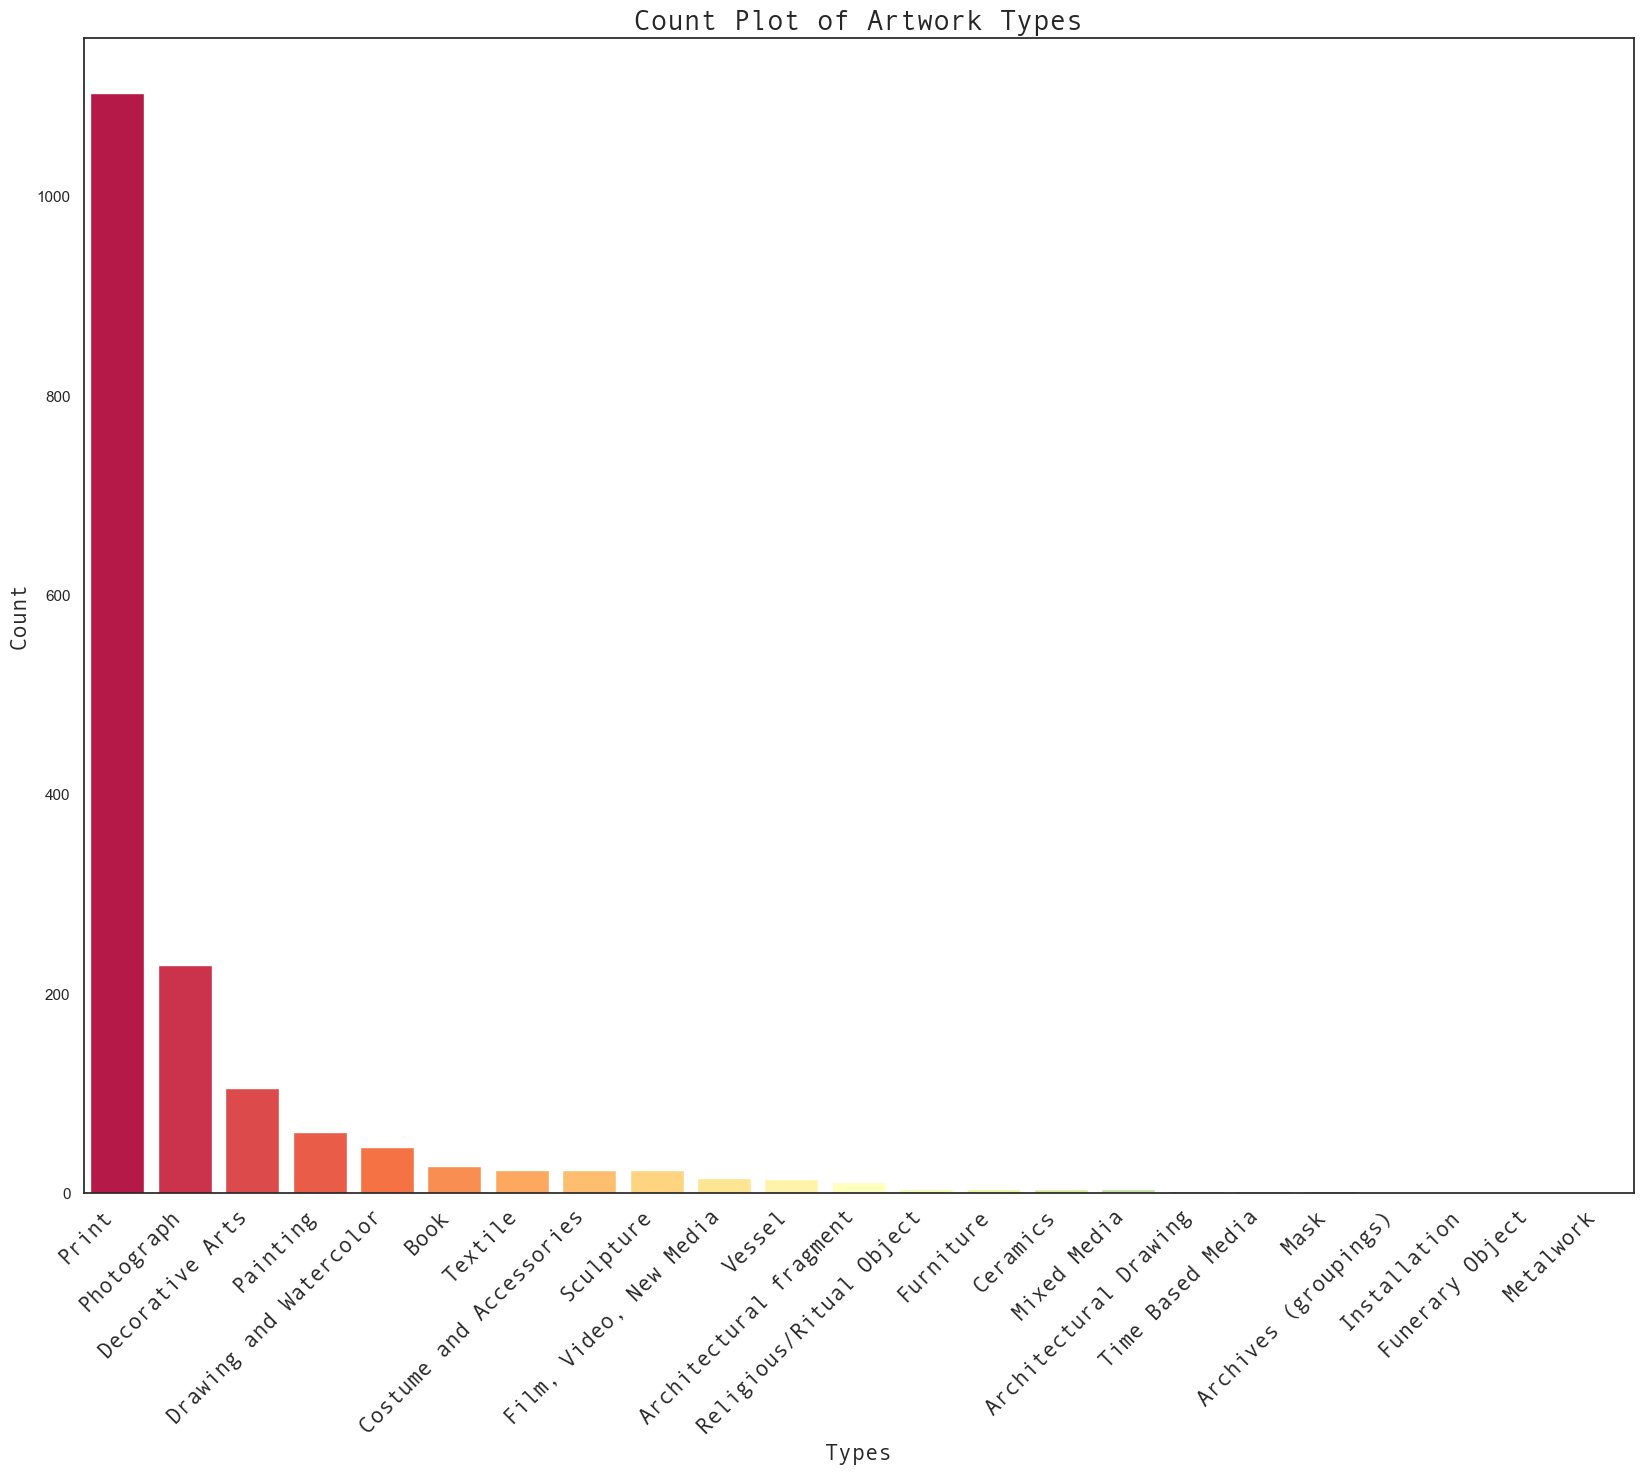

In [79]:
plt.figure(figsize=(20, 15))

# We set the theme
sns.set_theme(style="white")

# Create the countplot
counts_art = df['artwork_type_title'].value_counts().sort_values(ascending=False)
dep = sns.countplot(x='artwork_type_title', data=df, palette="Spectral", saturation=10, order=counts_art.index)

# Set the x-axis label
dep.set_xlabel('Types', fontdict=font_lab)

# Set the y-axis label
dep.set_ylabel('Count', fontdict=font_lab)

# Set the title
dep.set_title('Count Plot of Artwork Types', fontdict=font_t)

# Rotate the x-axis labels
dep.set_xticklabels(dep.get_xticklabels(), rotation=45, horizontalalignment='right', fontdict=font_lab)

# Show the plot
plt.show()

It is evident that prints make up the bulk of the artworks with a count of over 1000, followed by photographs which have a count greater than 200. On the other hand, the rest of the artwork types have a significantly lower count, with some even approaching zero.

### 2.b.
Deepening the analysis, we take the four most common types of work and then focus on the distribution of the colourfulness variable, which is a measure of how much color an artwork has, among them. This can help us gain insights into how artists use colour in different types of artworks.

In order to do so, we use a mixing plot which combines a scatterplot and its box plot for the colourfulness in each artwork type. By looking at the scatterplots, we can see how colourfulness is distributed and if there are any outliers or clusters of data points. The box plots can also provide information about the spread and variability of the colourfulness data.

In [80]:
# We get the top artwork types.
print(counts_art)

Print                      1104
Photograph                  229
Decorative Arts             105
Painting                     61
Drawing and Watercolor       46
Book                         27
Textile                      23
Costume and Accessories      23
Sculpture                    23
Film, Video, New Media       15
Vessel                       14
Architectural fragment       11
Religious/Ritual Object       4
Furniture                     4
Ceramics                      4
Mixed Media                   4
Architectural Drawing         2
Time Based Media              2
Mask                          2
Archives (groupings)          1
Installation                  1
Funerary Object               1
Metalwork                     1
Name: artwork_type_title, dtype: int64


In [81]:
# We create a new df, containg only the top 4 artworks type.
df_top_art = df[df['artwork_type_title'].isin(counts_art[counts_art >= 60].index)]

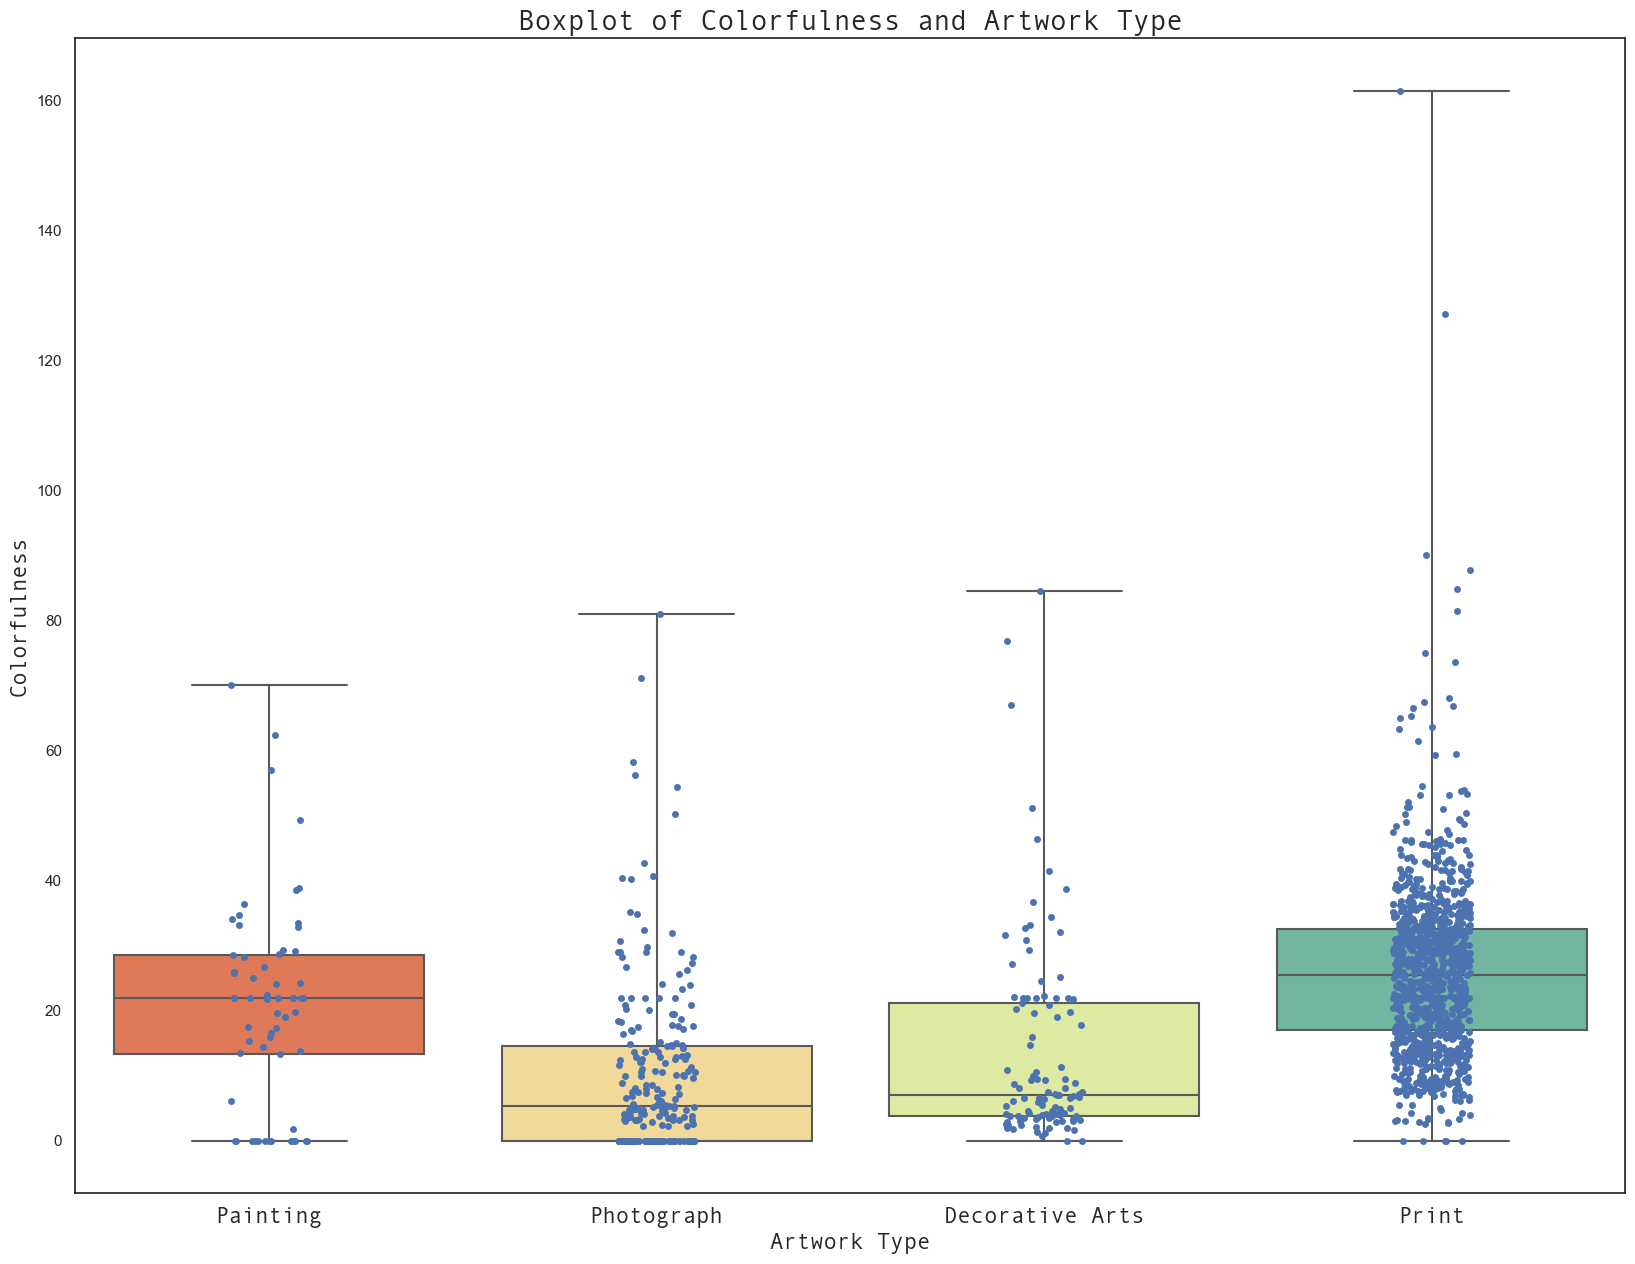

In [82]:
plt.figure(figsize=(20, 15))

# We set the theme
sns.set_theme(style="white")

box = sns.boxplot(data=df_top_art, x='artwork_type_title', y="colorfulness", whis=np.inf, palette="Spectral")

# Set the x-axis label
box.set_xlabel('Artwork Type', fontdict=font_lab)

# Set the y-axis label
box.set_ylabel('Colorfulness', fontdict=font_lab)

# Set the title
box.set_title('Boxplot of Colorfulness and Artwork Type', fontdict=font_t)
box.set_xticklabels(box.get_xticklabels(), rotation=0, horizontalalignment='center', fontdict=font_lab)

# Create the stripplot
strip = sns.stripplot(data=df_top_art, x='artwork_type_title', y="colorfulness", jitter=True)

# Show the plot
plt.show()

We can see from the plot that for what regards the colorfulness, the artwork type "Photograph" is the one that has lower values. We suspect that this might be because in general photographs are also very common in black-and-white or in sepia colors, meaning that the colorfulness will be lower than other types of artworks. The type that has the highest values is "Print", which not only has higher values, but it is the only one which has values of more than 100. Indeed, contrary to photography, prints are frequently in brighter colors. We also have to point out that the observations for Print were more than the ones for the other Artwork Types, which might have impacted the distribution of colorfulness.
Finally, we were not surprised to see that despite having less observations with respect to the other types, "Painting" has, on average, higher values than "Photography" and "Decorative Arts". Moreover, differently from "Print", it has no particularly high values, probably because painting in general tends to have an average level of color, which is rarely exaggerated due to difficulties in dealing with many strong colors.

### 2.c.
Lastly, we aim to analyze the use of color in artworks based on the material they were created with. This information can provide insights into the techniques and styles used by artists in different periods and cultures. By examining the colorfullness of artworks, we can gain a deeper understanding of how artists have employed color throughout history.

To achieve this, we have developed a dashboard that features a histogram comparing the materials used in creating artworks with their respective colorfulness, as well as a scatterplot illustrating the distribution of colorfulness across different years. Our dashboard provides a comprehensive and visually engaging tool for exploring the relationship between materials, colorfulness, and time period in artworks, offering valuable insights into the history of art and the creative process of artists from diverse cultures and backgrounds.

In [83]:
# Transform date_start in integer
df["date_start"] = df["date_start"].astype(int)

# Get the top 5 medium types and create a new dataframe
top_medium_types = df['medium_display'].value_counts().nlargest(5).index
df_filtered = df[df['medium_display'].isin(top_medium_types)]


In [84]:
TYPES = df_filtered['medium_display'].unique().tolist()
type_one_options = [ {"label": pktype, "value": pktype} for pktype in TYPES]

# Create the colors for the different medium_displays
CTYPE = {'Color woodblock print; oban': '#b93252', 'Color woodblock print': '#4ba4b1', 'Etching on paper': '#5755a5', 'Lithograph on paper': '#fca85d', 'Gelatin silver print': '#a0d8a4'}

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css'] # define the html style.

In [85]:
# Create the app
app = JupyterDash(__name__, external_stylesheets = external_stylesheets)

# Create the app layout
app.layout = html.Div([
        html.Div([
            html.Div([
                html.P("Filter by Medium:", className="control_label"),
                dcc.Dropdown(
                    id="one_types",
                    options=type_one_options,
                    multi=True,
                    value=[
                        "Color woodblock print; oban",
                        "Color woodblock print",
                        "Etching on paper",
                        "Lithograph on paper",
                        "Gelatin silver print",
                    ],
                    className="dcc_control",
                ),
            ], className="pretty_container four columns", id="cross-filter-options"),
            html.Div([dcc.Graph(id="graph")], id="countGraphContainer", className="pretty_container twelve columns"),
        ], className="row flex-display"),
        html.Div([
            html.Div([dcc.Graph(id="scatterplot")], className="pretty_container twelve columns"),
        ], className="row flex-display"),
    ],
    id="mainContainer",
    style={"display": "flex", "flex-direction": "column"}
)

In [86]:
# Definition of the histogram with all the aesthetics
@app.callback(  Output("graph", "figure"),
                [Input('one_types', "value")])
def make_histogram(one_types):
    fig = px.histogram(df_filtered[df_filtered["medium_display"].isin(one_types)],
                       x="colorfulness",
                       color="medium_display",
                       color_discrete_map=CTYPE)

    fig.update_traces(textposition="outside")
    fig.update_layout(template='simple_white',
        title={
            'text': 'Colorfulness in Medium Displays',
            'font': {'size': 20, 'family': 'Andale Mono', 'color': 'black'},
            'x': 0.5, # Center title horizontally
            'y': 1  # Position title vertically
        },
        font={
            'family': 'Andale Mono',
            'size': 14,
            'color': 'black'
        },
        legend={
            'title': {'text': 'Medium Display', 'font': {'size': 16, 'family': 'Andale Mono', 'color': 'black'}},
            'font': {'size': 12, 'family': 'Andale Mono', 'color': 'black'}
        },
        xaxis={
            'title': {'text': 'Colorfulness', 'font': {'size': 14, 'family': 'Andale Mono', 'color': 'black'}},
            'tickfont': {'size': 12, 'family': 'Andale Mono', 'color': 'black'}
        },
        yaxis={
            'title': {'text': 'Count', 'font': {'size': 14, 'family': 'Andale Mono', 'color': 'black'}},
            'tickfont': {'size': 12, 'family': 'Andale Mono', 'color': 'black'}
        },
        uniformtext_minsize=10,
        uniformtext_mode="hide"
    )

    return fig

In [87]:
# Definition of the scatterplot with all the aesthetics
@app.callback(Output("scatterplot", "figure"),
              [Input("one_types", "value")])
def make_scatterplot(one_types):
    fig = px.scatter(df_filtered[df_filtered["medium_display"].isin(one_types)],
                     x="date_start",
                     y="colorfulness",
                     color="medium_display",
                     color_discrete_map=CTYPE)
    fig.update_traces(marker_size=8)
    fig.update_layout(template='simple_white',
        title={
            'text': 'Colorfulness Across the Years',
            'font': {'size': 20, 'family': 'Andale Mono', 'color':'black'},
            'x': 0.5, # Center title horizontally
            'y': 1  # Position title vertically
        },
        font={
            'family': 'Andale Mono',
            'size': 14,
            'color': 'black'
        },
        legend={
            'title': {'text': 'Medium Display', 'font': {'size': 15, 'family': 'Andale Mono', 'color': 'black'}},
            'font': {'size': 12, 'family': 'Andale Mono', 'color': 'black'}
        },
        xaxis={
            'title': {'text': 'Years', 'font': {'size': 14, 'family': 'Andale Mono', 'color': 'black'}},
            'tickfont': {'size': 12, 'family': 'Andale Mono', 'color': 'black'}
        },
        yaxis={
            'title': {'text': 'Colorfulness', 'font': {'size': 14, 'family': 'Andale Mono', 'color': 'black'}},
            'tickfont': {'size': 12, 'family': 'Andale Mono', 'color': 'black'}
        }
    )
    return fig


In [88]:
# Run the app
app.run_server(mode='inline', port=2345)

Dash is running on http://127.0.0.1:2345/



In the histogram, we can observe that the level of colorfulness remains generally below 50 for most of the top five materials, with a few notable exceptions, that are better represented in the scatterplot, such as Litograph on paper and Color woodblock print oban. Lithography and color woodblock printing are both techniques that allow for the use of multiple colors in the printing process, which can contribute to higher levels of colorfulness in the final artwork. In the case of color woodblock print oban, it is a specific type of printmaking that often features vibrant colors and intricate designs, which may explain its higher level of colorfulness compared to other materials. Additionally, these exceptions may indicate that certain artistic traditions or cultures prioritize the use of color in their artwork, while others may place greater emphasis on other elements, such as line or texture.

In the scatterplot, the top five materials are relatively recent, except for Etching on paper, which was used between 1600 and 1970. Etching on paper was a popular printmaking technique during that period. However, it gradually fell out of favor with artists due to the rise of new printmaking techniques and technologies. With the advent of photography and digital printing methods, artists had more options to create their works, and the use of traditional etching techniques declined. Considering the colorfulness data, it appears that there is a trend of increasing colorfulness in more recent artistic practices. This suggests that contemporary artists may be more inclined to use vibrant colors and experiment with color combinations in their works, compared to artists from previous time periods.

These observations highlight the dynamic relationship between materials, colorfulness, and time period in art, underscoring how artistic techniques and styles evolve over time. The insights gained from this analysis can inform our understanding of the historical and cultural contexts of different artistic traditions and help us appreciate the unique creative processes and aesthetics of artists from diverse backgrounds.

- Color woodblock print; oban: a Japanese printmaking technique that involves creating a design on a wooden block, then using the block to print multiple copies of the design. Oban is a specific size of print, typically measuring around 15 x 10 inches.
- Color woodblock print: a type of printmaking technique that involves creating a design on a wooden block, then using the block to print multiple copies of the design. The term "color" indicates that the print includes multiple colors.
- Etching on paper: a printmaking technique that involves drawing a design on a metal plate and then using acid to "etch" the design into the plate. Ink is then applied to the plate and transferred to paper through a printing press.
- Lithograph on paper: a printmaking technique that involves drawing a design on a stone or metal plate using a greasy substance, then applying ink to the plate and transferring the design onto paper through a printing press.
- Gelatin silver print: a type of black and white photographic print that uses gelatin as the binding agent for the light-sensitive silver salts. It is a common photographic printing technique used in both analog and digital photography.

# Third Task:
# Focus on the artists.

### 3.a.
Firstly, our goal is to identify what are the main countries or cities where the artists come from. Specifically, we want to investigate over painters, since include one of the mostt famous artists such as Monet, Picasso, etc. This analysis will help us to better understand and visualize the relationships and connections that exist between artists and their home countries.

For this purpose, we first created a dictionary where we mapped artists to their home countries and added the artists’ home countries in a new column in the dataset. Then, we plotted a map to better visualize which countries are involved.

In [89]:
# We create a new df which contains only entries related to Painting. 
dfmap = df[df['artwork_type_title'] == 'Painting']

In [90]:
# We check for unique artists values.
dfmap['artist_title'].unique()

array(['Guido Reni', 'Hilaire Germain Edgar Degas', 'Berthe Morisot',
       'Claude Monet', 'Diego Velázquez', 'Kurt Seligmann',
       "Georgia O'Keeffe", 'Pablo Picasso', 'Eugène Delacroix',
       'Pierre Puvis de Chavannes', 'Édouard Manet', 'Philip Guston',
       'Pierre Bonnard', 'Max Ernst', 'Diego Rivera', 'Jack Whitten',
       'Martin Wong', 'Frederic Remington', 'William Trost Richards',
       'Artist unknown', 'Ary Scheffer', 'Monogrammist PG',
       'Giambattista Tiepolo', 'Spanish School', 'Luca Giordano',
       'Walter Shirlaw', 'George Inness', 'Henri Matisse',
       'O. Louis Guglielmi', 'James McNeill Whistler', 'Victor Brauner',
       'Cornelis Engelbrechtsz.', 'Miyoko Ito', 'Richard Maris Loving',
       'Marie Laurencin', 'Julius Gari Melchers', 'Jessie Arms Botke',
       'Theodore Robinson', 'Mary Cassatt', 'Peter Saul', 'Xugu',
       'Mori Sosen', 'Vija Celmins', 'Joan Snyder', 'Joan Mitchell',
       'Lari Pittman', 'Ben Shahn', 'Chen Ruyan', 'Lu Wei', 

In [91]:
# Add a new column called 'artist_country' to the DataFrame, using a dictionary which maps artist to their respective
# continents.
artist_country_dict = {
    'Guido Reni': 'Italy',
    'Hilaire Germain Edgar Degas': 'France',
    'Berthe Morisot': 'France',
    'Claude Monet': 'France',
    'Diego Velázquez': 'Spain',
    'Kurt Seligmann': 'Switzerland',
    "Georgia O'Keeffe": 'United States',
    'Pablo Picasso': 'Spain',
    'Eugène Delacroix': 'France',
    'Pierre Puvis de Chavannes': 'France',
    'Édouard Manet': 'France',
    'Philip Guston': 'United States',
    'Pierre Bonnard': 'France',
    'Max Ernst': 'Germany',
    'Diego Rivera': 'Mexico',
    'Jack Whitten': 'United States',
    'Martin Wong': 'United States',
    'Frederic Remington': 'United States',
    'William Trost Richards': 'United States',
    'Artist unknown': 'N/A',
    'Ary Scheffer': 'Netherlands',
    'Monogrammist PG': 'N/A',
    'Giambattista Tiepolo': 'Italy',
    'Spanish School': 'Spain',
    'Luca Giordano': 'Italy',
    'Walter Shirlaw': 'United States',
    'George Inness': 'United States',
    'Henri Matisse': 'France',
    'O. Louis Guglielmi': 'United States',
    'James McNeill Whistler': 'United States',
    'Victor Brauner': 'Romania',
    'Cornelis Engelbrechtsz.': 'Netherlands',
    'Miyoko Ito': 'United States',
    'Richard Maris Loving': 'United States',
    'Marie Laurencin': 'France',
    'Julius Gari Melchers': 'United States',
    'Jessie Arms Botke': 'United States',
    'Theodore Robinson': 'United States',
    'Mary Cassatt': 'United States',
    'Peter Saul': 'United States',
    'Xugu': 'China',
    'Mori Sosen': 'Japan',
    'Vija Celmins': 'Latvia',
    'Joan Snyder': 'United States',
    'Joan Mitchell': 'United States',
    'Lari Pittman': 'United States',
    'Ben Shahn': 'United States',
    'Chen Ruyan': 'China',
    'Lu Wei': 'China',
    'Ogata Korin': 'Japan',
    'Xu Wei': 'China',
    'Wang Jian': 'China',
    'Fan Qi': 'China',
    'Léon Joseph Florentin Bonnat': 'France'
}

In [92]:
dfmap['artist_country'] = dfmap['artist_title'].map(artist_country_dict)
dfmap.head()

/var/folders/r_/sqjm85jx2m98b4608qzfsyvr0000gn/T/ipykernel_10192/1609114197.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,title,has_not_been_viewed_much,date_start,date_end,medium_display,is_public_domain,has_multimedia_resources,has_educational_resources,has_advanced_imaging,colorfulness,is_on_view,artwork_type_title,department_title,artist_title,artist_country
0,11434,Salome with the Head of Saint John the Baptist,False,1635,1645.0,Oil on canvas,True,True,False,False,25.7281,False,Painting,Painting and Sculpture of Europe,Guido Reni,Italy
1,14572,The Millinery Shop,False,1874,1886.0,Oil on canvas,True,True,False,False,38.9301,False,Painting,Painting and Sculpture of Europe,Hilaire Germain Edgar Degas,France
2,11723,Woman at Her Toilette,False,1870,1880.0,Oil on canvas,True,True,False,False,16.6011,False,Painting,Painting and Sculpture of Europe,Berthe Morisot,France
3,16554,The Artist's House at Argenteuil,False,1873,1873.0,Oil on canvas,True,True,False,False,25.0588,False,Painting,Painting and Sculpture of Europe,Claude Monet,France
4,21934,Kitchen Scene,False,1618,1622.0,Oil on canvas,True,True,False,False,13.2756,False,Painting,Painting and Sculpture of Europe,Diego Velázquez,Spain


In [93]:
# We check for missing values.
dfmap.isnull().sum()

id                           0
title                        0
has_not_been_viewed_much     0
date_start                   0
date_end                     0
medium_display               0
is_public_domain             0
has_multimedia_resources     0
has_educational_resources    0
has_advanced_imaging         0
colorfulness                 0
is_on_view                   0
artwork_type_title           0
department_title             0
artist_title                 0
artist_country               0
dtype: int64

In [94]:
# We use the transform function to create a new column with the counts for each country.
dfmap['num_artists'] = dfmap.groupby('artist_country')['artist_title'].transform('nunique')
dfmap.head()

/var/folders/r_/sqjm85jx2m98b4608qzfsyvr0000gn/T/ipykernel_10192/401819424.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,title,has_not_been_viewed_much,date_start,date_end,medium_display,is_public_domain,has_multimedia_resources,has_educational_resources,has_advanced_imaging,colorfulness,is_on_view,artwork_type_title,department_title,artist_title,artist_country,num_artists
0,11434,Salome with the Head of Saint John the Baptist,False,1635,1645.0,Oil on canvas,True,True,False,False,25.7281,False,Painting,Painting and Sculpture of Europe,Guido Reni,Italy,3
1,14572,The Millinery Shop,False,1874,1886.0,Oil on canvas,True,True,False,False,38.9301,False,Painting,Painting and Sculpture of Europe,Hilaire Germain Edgar Degas,France,10
2,11723,Woman at Her Toilette,False,1870,1880.0,Oil on canvas,True,True,False,False,16.6011,False,Painting,Painting and Sculpture of Europe,Berthe Morisot,France,10
3,16554,The Artist's House at Argenteuil,False,1873,1873.0,Oil on canvas,True,True,False,False,25.0588,False,Painting,Painting and Sculpture of Europe,Claude Monet,France,10
4,21934,Kitchen Scene,False,1618,1622.0,Oil on canvas,True,True,False,False,13.2756,False,Painting,Painting and Sculpture of Europe,Diego Velázquez,Spain,3


In [95]:
# We create a choropleth map using Plotly Express.
fig_map = px.choropleth(dfmap, 
                        locations='artist_country', 
                        locationmode='country names', 
                        color='num_artists',
                        hover_data=['num_artists'],
                        color_continuous_scale='Reds')
                        
fig_map.update_layout(
    title={
        'text': 'Artists by Country',
        'font': {'size': 20, 'color': 'black', 'family': 'Andale Mono'},
        'x': 0.5, # center the title
        'y': 0.95, # position the title at the top of the chart
    },
    legend={
        'title': {'text': 'Number of Artists'},
        'font': {'size': 15, 'family': 'Andale Mono'},
    },
    coloraxis_colorbar={
        'title': {'text': 'Number of Artists',
                  'font': {'size': 16, 'color': 'red'}},
        'title.font': {'size': 14, 'color': 'black', 'family': 'Andale Mono'},
        'outlinewidth': 1,
        'tickfont': {'size': 12, 'color': 'black', 'family': 'Andale Mono'},
        'ticklen': 10,
    },
    geo={
        'showcountries': True, # display country borders
        'showcoastlines': True, # display coastlines
        'landcolor': 'white',
        'oceancolor': 'lightblue',
        'countrycolor': 'white',
    }
)

fig_map.show()

From the map, we can see that the majority of painters come from the United States of America. This is because of insights obtained from analyzing the museum's collection, which showed a strong representation of American artists.

As for Europe, the colors on the map are relatively light, except for France, which is not surprising since many famous painters such as Monet, Delacroix, Degas, etc. come from there.

Regarding Asia, most of the artists are Chinese, which is likely due to the vast population of China and the long history of art in the country.

### 3.b.
Secondly, we want to see which are the preferred used materials, in realizing artworks. This could be a useful way to identify patterns and trends in the art world, and to gain insights into how different materials are used in different contexts. By analysing the connections between different materials, we may also be able to identify emerging trends and styles, as well as understand the historical context of different artistic movements.

To do this, we use a network, where we display the materials and the artists and how they are interconnected, in order to identify any clusters or patterns between them.

In [96]:
# We use value_counts() to count the occurrences of each unique value in the "medium_display" column.
class_counts = df["medium_display"].value_counts()

# We select the top 50 biggest classes.
top_classes = class_counts.head(50).index

# We filter the DataFrame to only include rows with medium_display in the top 20 classes.
df_network = df[df["medium_display"].isin(top_classes)]

In [97]:
# We create the network and create the edges
edges = []
for index, row in df_network.iterrows():
    edges.append((row['medium_display'], row['artist_title']))

G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=3)

# We create the trace of artists and methods and the color
node_trace_artist = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text', name='artists', marker=dict(color='#a60944', size=[]))
node_trace_method = go.Scatter(x=[], y=[], text=[], mode='markers', hoverinfo='text', name='methods', marker=dict(color='#5d4fa2', size=[]))
edge_trace = go.Scatter(x=[], y=[], line=dict(width=0.5, color='gray'), mode='lines')

for node in G.nodes():
    x, y = pos[node]
    if node in df_network['artist_title'].values:
        node_trace_artist['x'] += (x,)
        node_trace_artist['y'] += (y,)
        node_trace_artist['text'] += (node,)
        node_trace_artist['marker']['size'] += (6,)
    else:
        node_trace_method['x'] += (x,)
        node_trace_method['y'] += (y,)
        node_trace_method['text'] += (node,)
        node_trace_method['marker']['size'] += (10,)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# We fix the layout of the network
fig = go.Figure(data=[edge_trace, node_trace_artist, node_trace_method], layout=go.Layout(title={
        'text': 'Artists and Methods',
        'font': {'size': 20, 'family': 'Andale Mono', 'color': 'black'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'}, showlegend=True, legend=dict(x=1, y=1), hovermode='closest', margin=dict(b=20,l=5,r=5,t=40), xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False), plot_bgcolor="white", paper_bgcolor="white"))

fig.update_layout(
    legend=dict(
        font=dict(
            family='Andale Mono',
            size=15,
            color='black'
        )
    )
)
fig.show()

# We save the network in html
# fig.write_html('network.html')

We can see that there are many interconnections between artists and materials. In some cases, multiple materials are linked together because an artist has used both; in other cases, it is the material that connects more than one artist. It is also evident that there are more prominent clusters, with dozens of nodes connected by a single hub, as well as more solitary nodes because it can happen that a particular material has been used by only one artist.

These interconnections between artists and materials suggest that there is a diversity in the types of materials used in creating artworks. This could indicate the artists' willingness to experiment with different materials to achieve their desired artistic expressions.

Moreover, the existence of multiple clusters of nodes connected by a single hub could suggest the presence of artistic movements or schools, where artists who are connected by a shared artistic vision or style also tend to use similar materials.

Finally, the presence of solitary nodes could indicate the existence of artists who are unique in their choice of materials or who are less connected to artistic movements or schools. It could also suggest the possibility of emerging or less-established artists who are still exploring different materials in their artwork.

# Fourth Task:
# Focus on the digital aspect of the museum: the website.

The museum's website is an ideal platform to showcase the majority of its collection, giving visitors the opportunity to explore and learn about the items that are/are not currently on display.

For this task, we focus on has_not_been_viewed_much and its relationship with other variables. Indeed, this kind of information can be useful in several ways, for example it could be an indication that the artwork is not as popular or has not enough resources as others in the museum's collection and may require more attention or promotion to increase its visibility. On the other hand, finding out if it has high-resolution images or multimedia resources such as interactive exhibits, can also be important for the high popularity of an artwork.

Our idea is to understand the correlation among these variables through a heatmap. By using a heatmap, we can represent the data graphically, making it easier to see which variables are strongly correlated and which ones are not.


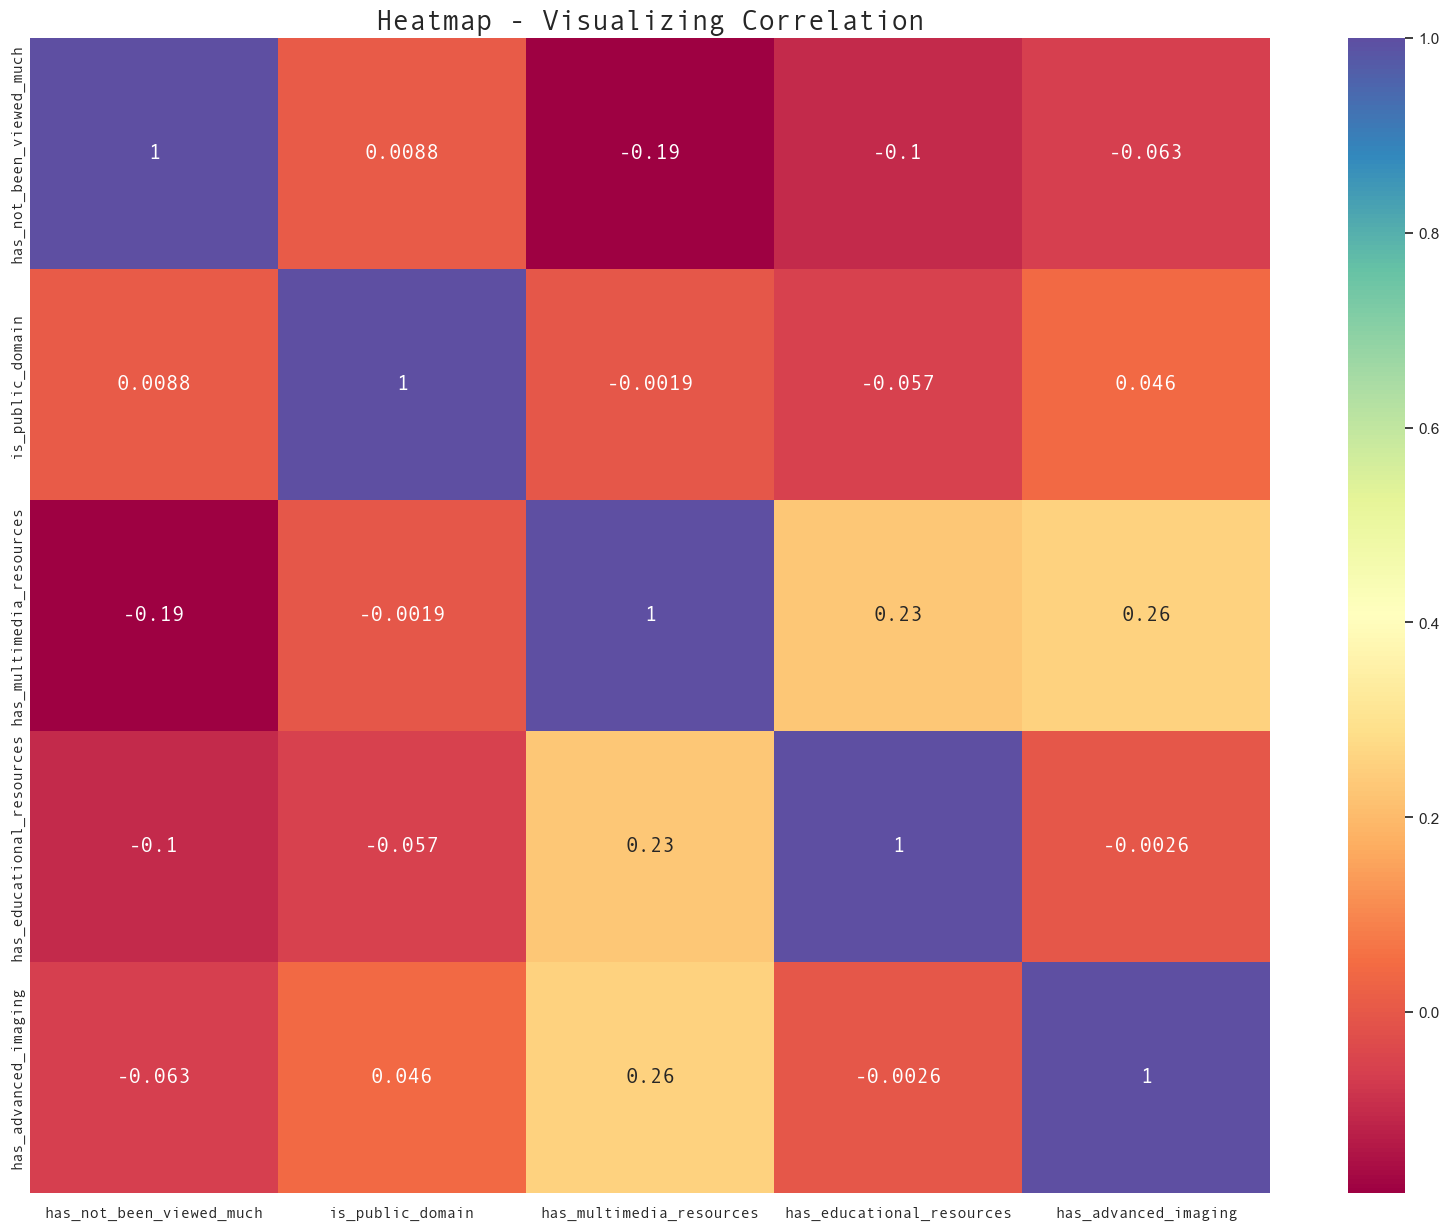

In [98]:
plt.figure(figsize=(20, 15))

# We create a df with the target variables.
corr_df = df[['has_not_been_viewed_much','is_public_domain', 'has_multimedia_resources', 'has_educational_resources', 'has_advanced_imaging']]
corr_matrix = corr_df.corr(method='pearson')

font_heat = font_lab = {'family': 'Andale Mono', 'size': 11}

# We create a heatmap using Seaborn.
heat = sns.heatmap(corr_matrix, annot=True, cmap='Spectral', annot_kws={'fontfamily': 'Andale Mono', 'fontsize': 15})

# We set the title.
heat.set_title('Heatmap - Visualizing Correlation', fontdict=font_t)
heat.set_xticklabels(heat.get_xticklabels(), rotation=0, horizontalalignment='center', fontdict=font_heat)
heat.set_yticklabels(heat.get_xticklabels(), rotation=90, horizontalalignment='center', fontdict=font_heat)

plt.show()

# plt.savefig('heat.png', dpi=300, bbox_inches='tight')

After the analysis, we realized that the variables were not strongly correlated with each other. This suggests that the level of an artwork's popularity or its access to high-resolution images and multimedia resources are not necessarily related to whether or not it has been viewed much on the museum's website. This could mean that other factors may play a more significant role in an artwork's visibility on the website, such as the artist's reputation, the artwork's historical significance, or the museum's marketing and outreach efforts.

These insights highlight the complexity of understanding what drives an artwork's visibility on a museum's website. While having high-quality images or multimedia resources can certainly enhance an artwork's online presence, other factors such as the artist's reputation, historical significance, or the museum's marketing and outreach efforts may play a more significant role. Therefore, museums should consider a range of factors when promoting their collections online, and invest in comprehensive strategies that take into account not only the availability of high-quality images and multimedia resources, but also the broader cultural and historical significance of the artworks, as well as their potential appeal to different audiences. By doing so, museums can ensure that their online collections are both informative and engaging, and attract a diverse range of visitors from around the world.